<a href="https://colab.research.google.com/github/gnbhub/20231_AI_Study/blob/master/week4/week4_janghun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

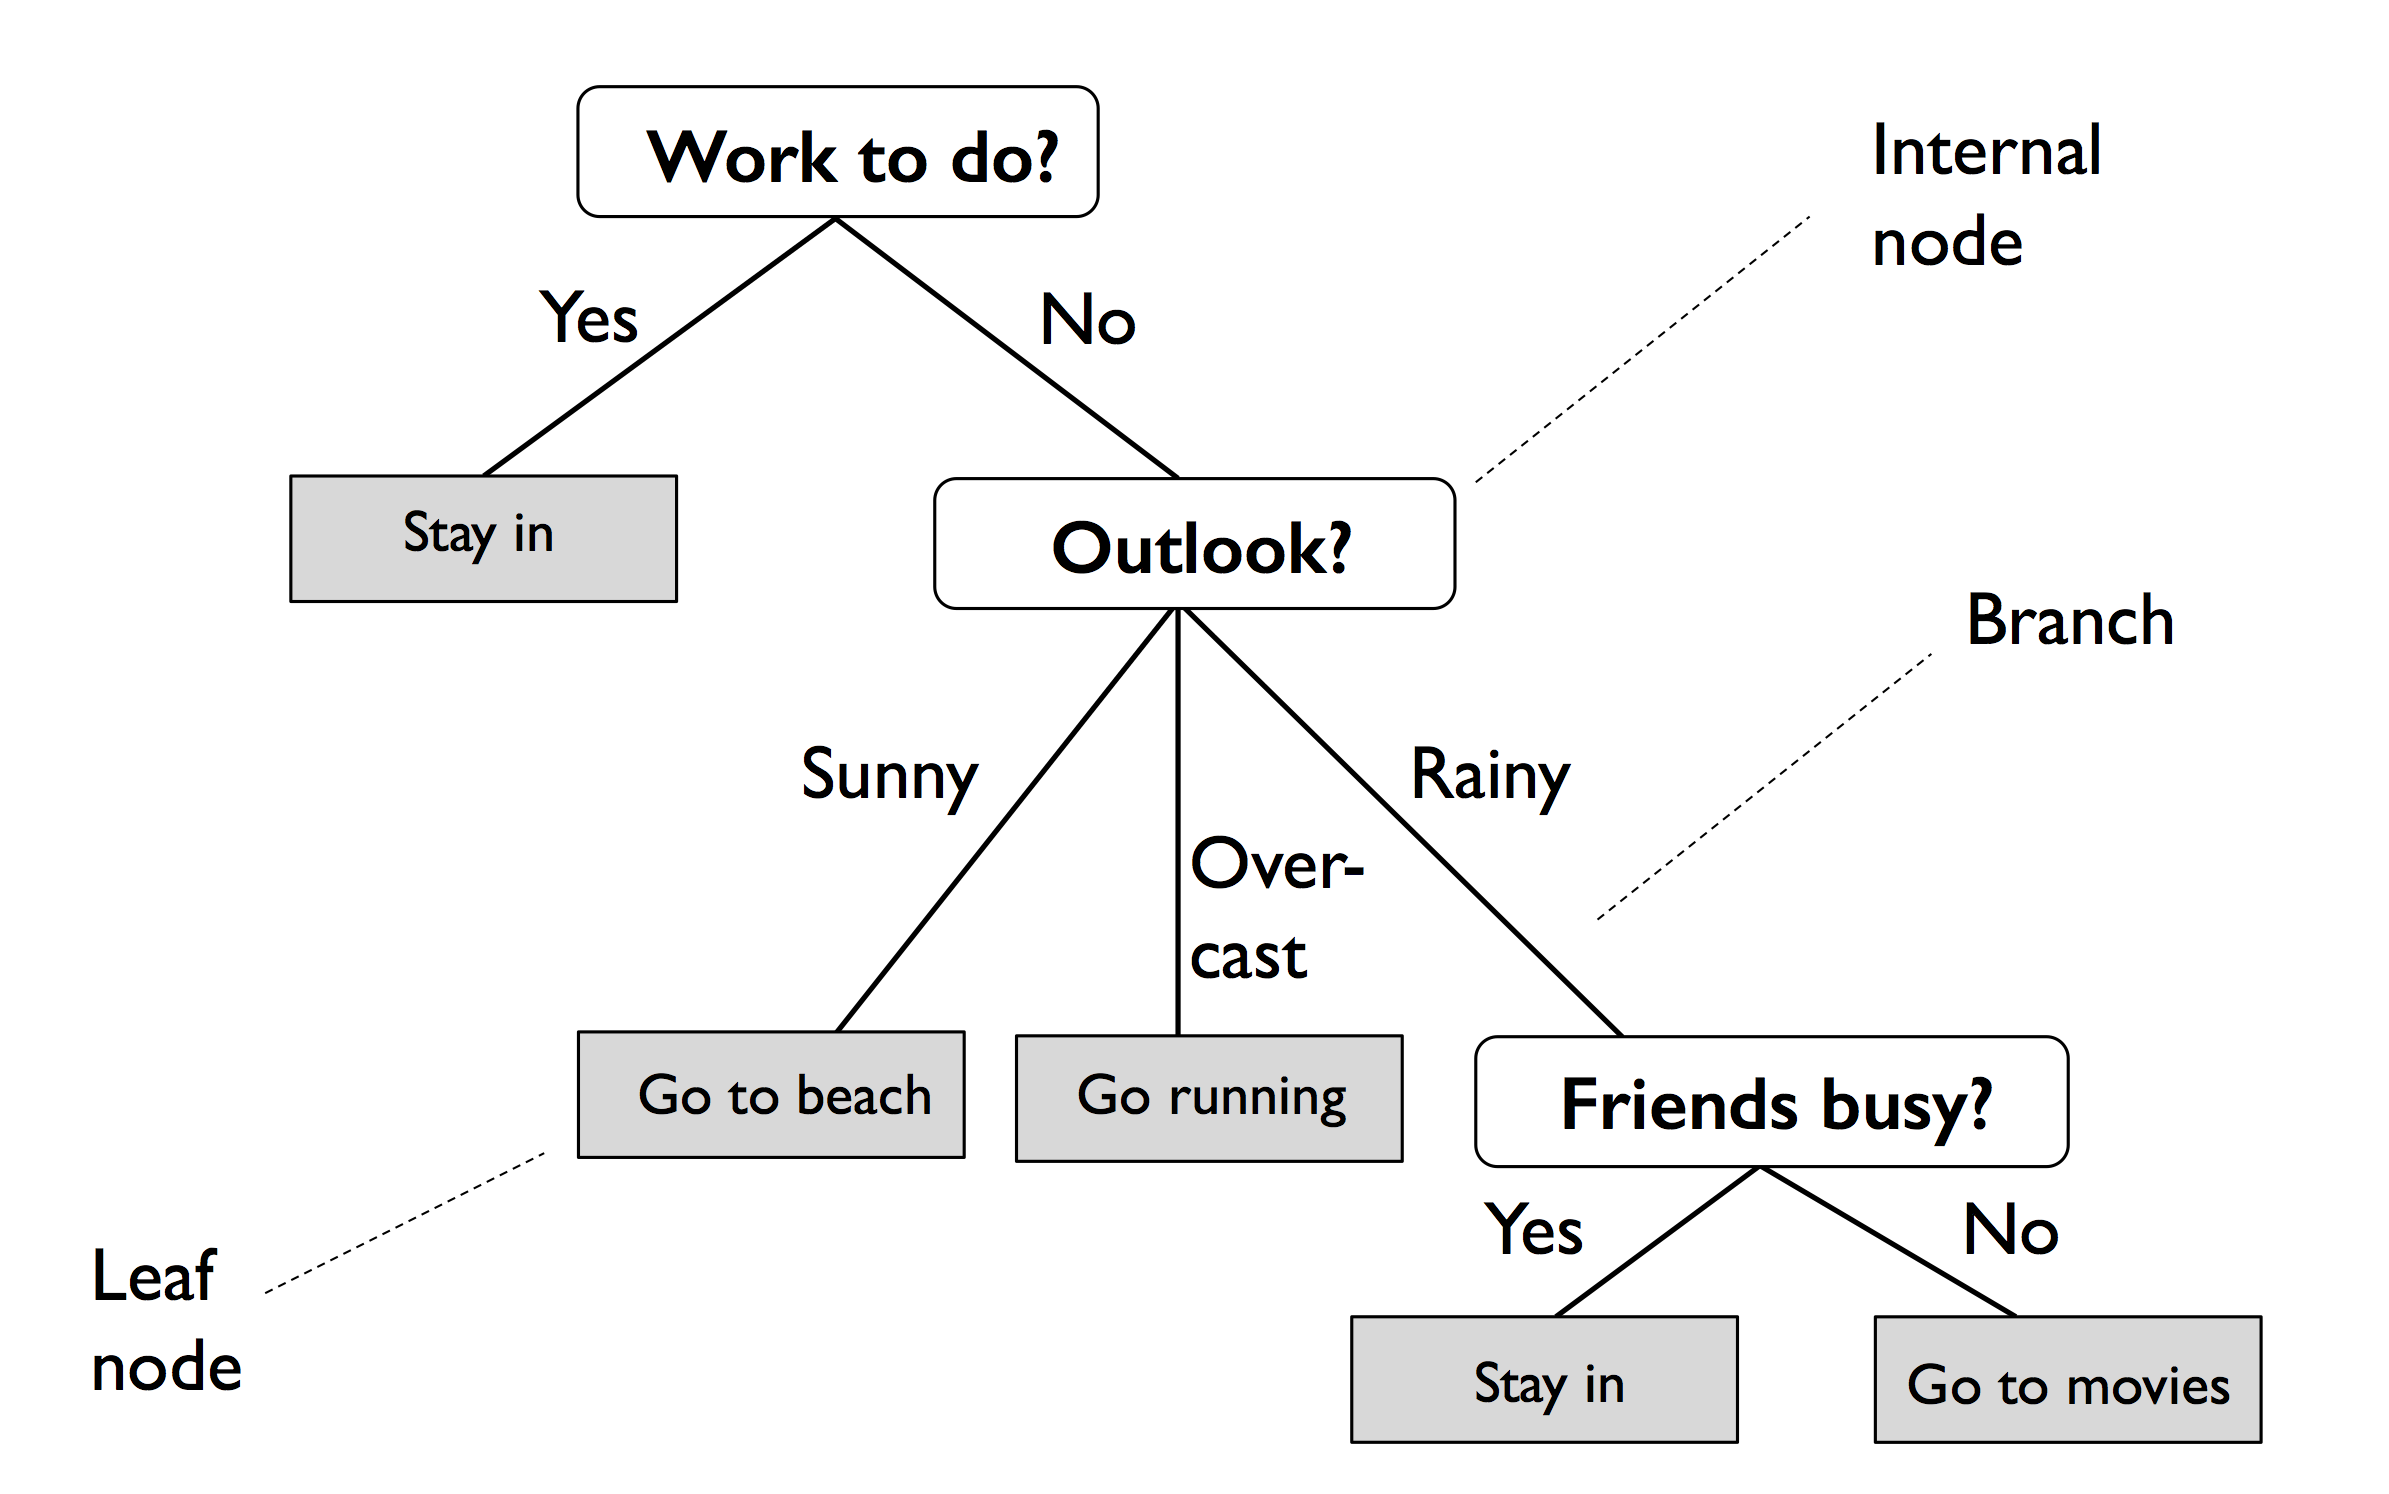

결정 트리 학습

1. 노드
  * 루트노드 / 리프노드
  * 부모노드 / 자식노드
2. 가지

이진트리 : 가지가 Yes or No의 2개

순수노드 : 루프노드에 1종류의 클래스만 있는 것

가지치기 : 루프노드가 순수노드가 되지 않게 없애기(질문의 개수를 제한하여 규제)

질문 선정 방법 : 부모노드 정보 이득과 자식노드 정보 이득의 차이가 최대가 되는 질문을 찾기

정보 이득 최대화

IG = I_p - (n_l/n_p)I_l - (n_r/n_p)I_r
* IG : 정보 이득
* I(불순도) : 여러 종류의 클래스가 섞여있는 정도
  * 순수노드 : I = 0
  * I_p : 부모노드의 불순도
  * I_l : 왼쪽 자식노드의 불순도
  * I_r : 오른쪽 자식노드의 불순도
* n : 클래스 개수
  * n_p : 부모노드 샘플 개수
  * n_l : 왼쪽 자식노드의 샘플 개수
  * n_r : 오른쪽 자식노드의 샘플 개수

불순도 계산 방식
* 지니 불순도
  * I 최대값 1
  * 완만-급격
  * 사이킷런에서 제공
* 엔트로피 불순도
  * I 최대값 0.5
  * 완만-급격
  * 사이킷런에서 제공
* 분류오차 불순도
  * I 최대값 0.5
  * 선형적

랜덤 포레스트
* 여러 개의 결정 트리를 연결하기
* m개의 데이터에서 중복을 허용하여 m개의 데이터를 랜덤으로 샘플링(부트스트랩 샘플링)한 데이터에서 rootm개만 뽑아서 노드를 분할하기

K-최근접 이웃
* 주위의 샘플들 중 가장 많은 샘플

p = 2(유클리드 거리)

metric = 'minkowski'

# 4장 누락된 데이터 다루기

누락된 값 식별

In [ ]:
import pandas as pd
from io import StringIO #문자열 => csv파일
import sys

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,''' #중간에 데이터 누락

# 파이썬 2.7을 사용하는 경우
# 다음과 같이 문자열을 유니코드로 변환해야 합니다:
if (sys.version_info < (3, 0)):
    csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.isnull().sum() #axis = 0(각 열에 대해서)

A    0
B    0
C    1
D    1
dtype: int64

In [ ]:
# `values` 속성으로 넘파이 배열을 얻을 수 있습니다
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

누락된 값 제거

In [ ]:
# 누락된 값이 있는 행을 삭제합니다
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# 누락된 값이 있는 열을 삭제합니다
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [ ]:
# 모든 열이 NaN인 행을 삭제합니다
df.dropna(how='all') #기본값 how='any'

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
# NaN 아닌 값이 네 개보다 작은 행을 삭제합니다
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [ ]:
# 특정 열에 NaN이 있는 행만 삭제합니다(여기서는 'C'열)
df.dropna(subset=['C']) #리스트

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


누락된 값 대체

In [ ]:
# 원래 배열
df.values

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [ ]:
# 열의 평균으로 누락된 값 대체하기
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean') # + median, most_frequent, constant
imr = imr.fit(df.values) #열의 평균값 계산
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
# 행의 평균으로 누락된 값 대체하기
from sklearn.preprocessing import FunctionTransformer

ftr_imr = FunctionTransformer(lambda X: imr.fit_transform(X.T).T)
imputed_data = ftr_imr.fit_transform(df.values)
imputed_data

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  6.33333333,  8.        ],
       [10.        , 11.        , 12.        , 11.        ]])

In [ ]:
imr = SimpleImputer(add_indicator=True)
imputed_data = imr.fit_transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ,  0. ,  0. ],
       [ 5. ,  6. ,  7.5,  8. ,  1. ,  0. ],
       [10. , 11. , 12. ,  6. ,  0. ,  1. ]])

In [ ]:
imr.indicator_

MissingIndicator(error_on_new=False)

In [ ]:
imr.indicator_.features_

array([2, 3])

In [ ]:
imr.indicator_.fit_transform(df.values)

array([[False, False],
       [ True, False],
       [False,  True]])

In [ ]:
# 사이킷런 0.24 버전에서 추가되었습니다.
imr.inverse_transform(imputed_data)

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iimr = IterativeImputer()
iimr.fit_transform(df.values)

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.00047063,  8.        ],
       [10.        , 11.        , 12.        , 12.99964527]])

In [ ]:
from sklearn.impute import KNNImputer

kimr = KNNImputer()
kimr.fit_transform(df.values)

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [ ]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


In [ ]:
df.fillna(method='bfill') # method='backfill'와 같습니다

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,12.0,8.0
2,10.0,11.0,12.0,NaN


In [ ]:
df.fillna(method='ffill') # method='pad'와 같습니다

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,3.0,8.0
2,10.0,11.0,12.0,8.0


In [ ]:
df.fillna(method='ffill', axis=1)

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,6.0,8.0
2,10.0,11.0,12.0,12.0


범주형 데이터 다루기

In [ ]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [ ]:
# 순서가 있는 특성 매핑
# 매핑 dictionary를 만들어서 매핑
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
# 매핑된 값을 원래 값으로 바꾸기
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0    NaN
1    NaN
2    NaN
Name: size, dtype: object

In [ ]:
import numpy as np

# 클래스 레이블을 문자열에서 정수로 바꾸기 위해
# 매핑 딕셔너리를 만듭니다
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [ ]:
# 클래스 레이블을 문자열에서 정수로 바꿉니다
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [ ]:
# 클래스 레이블을 거꾸로 매핑합니다
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 사이킷런의 LabelEncoder을 사용한 레이블 인코딩
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([1, 0, 1])

In [ ]:
# 거꾸로 매핑
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

In [ ]:
class_le.classes_

array(['class1', 'class2'], dtype=object)